## Introduction to Google Cloud Datalab

Cloud Datalab is a powerful interactive tool created to explore, analyze, transform and visualize data and build machine learning models on Google Cloud Platform. It runs on Google Compute Engine and connects to multiple cloud services easily so you can focus on your data science tasks.


## Python 3

Datalab supports both Python2 and Python3 for code execution. 

* When creating a new notebook, you'll have the choice between Python 2 and Python 3.
* You can also change the language associated with a notebook; this information will be written into the `.ipynb` file itself, and thus will be preserved for future sessions.

In [2]:
import sys
print('Hello, Datalab from Google. Python version {}!'.format(sys.version_info[0]))

Hello, Datalab from Google. Python version 3!


## TensorFlow execution

Datalab allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [4]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

## Visualization

Datalab includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


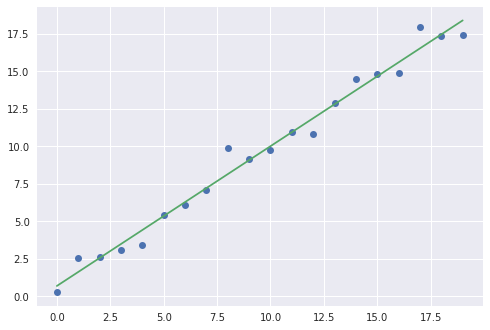

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


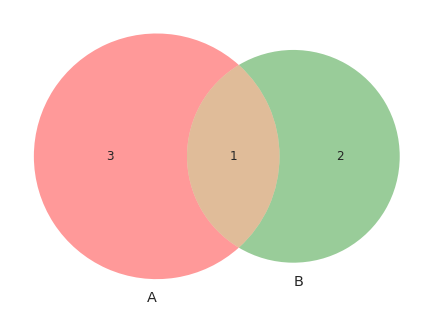

In [7]:
# Only needs to be run once at the top of the notebook.
!pip install -q matplotlib-venn

# Now the newly-installed library can be used anywhere else in the notebook.
from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Bar charts and histograms

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


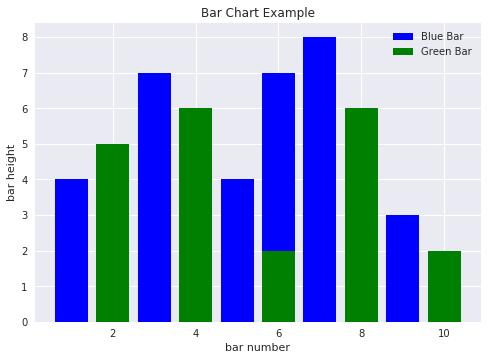

In [1]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


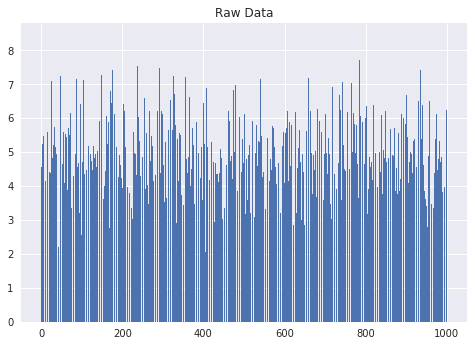

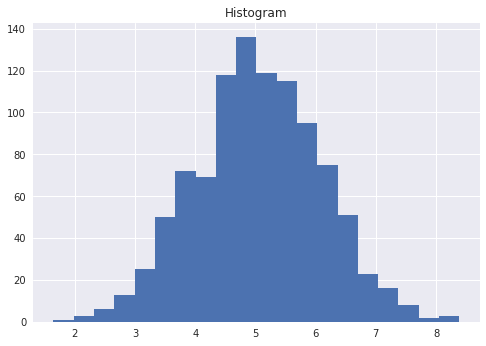

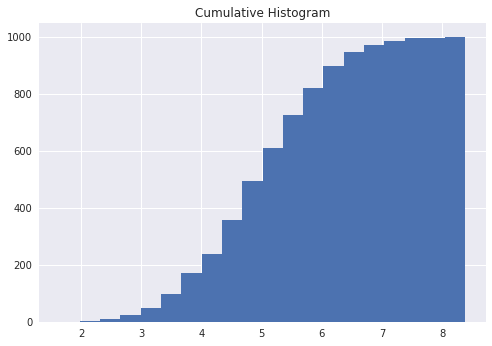

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = 5 + np.random.randn(1000)

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

### Pie charts

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


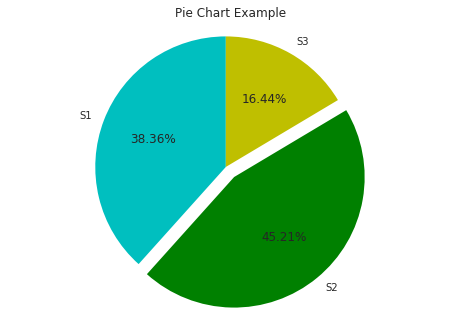

In [3]:
import matplotlib.pyplot as plt

labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

# Bigquery connection


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


# Use BigQuery through Pandas

[Pandas GBQ Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_gbq.html)

The [GSOD sample table](https://bigquery.cloud.google.com/table/bigquery-public-data:samples.gsod) contains weather information collected by NOAA, such as precipitation amounts and wind speeds from late 1929 to early 2010.


### Sample approximately 2000 rows from bigquery table

In [4]:
project_id = 'predictive-maintenance-5'

import pandas as pd

sample_count = 2000
row_count = pd.io.gbq.read_gbq('''
  SELECT 
    COUNT(*) as total
  FROM [bigquery-public-data:samples.gsod]''', project_id=project_id, verbose=False).total[0]

df = pd.io.gbq.read_gbq('''
  SELECT
    *
  FROM
    [bigquery-public-data:samples.gsod]
  WHERE RAND() < %d/%d
''' % (sample_count, row_count), project_id=project_id, verbose=False)

print('Full dataset has %d rows' % row_count)

Full dataset has 114420316 rows


### Sample statistics

In [5]:
df.describe()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,mean_sealevel_pressure,mean_station_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,total_precipitation,snow_depth
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,1930.000000,1540.000000,705.000000,1833.000000,1987.000000,1957.000000,278.000000,2016.000000,0.0,1864.000000,120.000000
mean,509973.126921,90457.076351,1987.151215,6.525533,15.782846,52.004561,13.050570,41.554663,1014.837663,964.988512,12.338843,6.816105,12.179663,25.170144,43.433036,NaN,0.065869,11.815000
std,296952.234483,26155.478601,15.822692,3.460300,8.742766,23.854037,7.932779,22.282850,9.437207,71.864377,10.154338,4.997336,6.823403,9.906159,23.664468,NaN,0.271214,14.265282
min,10016.000000,13.000000,1930.000000,1.000000,1.000000,-42.099998,4.000000,-48.099998,962.000000,601.900024,0.000000,0.000000,1.000000,6.000000,-47.000000,NaN,0.000000,0.400000
25%,251730.000000,99999.000000,1977.000000,4.000000,8.000000,36.900002,7.000000,28.299999,1009.400024,949.299988,6.400000,3.400000,7.800000,19.000000,30.200001,NaN,0.000000,3.025000
50%,549160.000000,99999.000000,1989.000000,6.000000,16.000000,55.799999,8.000000,43.799999,1014.500000,993.200012,9.600000,5.800000,11.100000,23.900000,46.000000,NaN,0.000000,7.500000
75%,724810.000000,99999.000000,2000.000000,10.000000,23.000000,70.300003,24.000000,57.900002,1020.024994,1008.500000,14.900000,8.900000,15.500000,28.900000,60.799999,NaN,0.010000,13.800000
max,999999.000000,99999.000000,2010.000000,12.000000,31.000000,101.500000,24.000000,80.900002,1049.500000,1035.400024,99.400002,60.099998,73.800003,77.699997,95.000000,NaN,5.910000,87.000000


### Show top 10 rows

In [6]:
df.head(10)

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,713740,99999,2001,1,30,16.000000,4,8.600000,4,NaN,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,702647,99999,2002,1,7,30.200001,10,21.200001,10,NaN,...,NaN,None,0.00,5.1,False,False,False,False,False,False
2,682400,99999,2005,12,1,75.099998,22,62.500000,22,NaN,...,NaN,None,1.12,NaN,False,False,False,False,False,False
3,344150,99999,1953,10,30,28.500000,4,18.500000,4,1029.500000,...,NaN,None,NaN,NaN,False,False,False,False,False,False
4,383410,99999,2005,4,23,62.500000,7,49.400002,7,1015.900024,...,NaN,None,0.00,NaN,False,False,False,False,False,False
5,747320,99999,1975,2,19,41.799999,24,10.800000,24,1015.700012,...,NaN,None,0.00,NaN,False,False,False,False,False,False
6,306220,99999,1978,10,16,25.000000,8,17.799999,8,1029.900024,...,NaN,None,0.00,NaN,False,False,False,False,False,False
7,583140,99999,2000,8,14,84.000000,8,76.800003,8,1002.700012,...,NaN,None,0.06,NaN,False,False,False,False,False,False
8,725377,14804,1960,4,15,55.799999,24,52.000000,24,1016.299988,...,NaN,None,NaN,NaN,True,True,True,True,True,True
9,133760,99999,2008,7,17,72.500000,8,55.400002,8,1014.200012,...,NaN,None,0.00,NaN,False,False,False,False,False,False


### Aggregate for analysis

10 highest total_precipitation samples

In [8]:
df.sort_values('total_precipitation', ascending=False).head(10)[['station_number', 'year', 'month', 'day', 'total_precipitation']]

,station_number,year,month,day,total_precipitation
259,307770,1963,6,9,5.91
693,569770,1979,7,9,2.77
937,483570,1965,4,29,2.76
1286,588460,1979,3,13,2.76
1452,325400,1961,10,8,2.40
500,645560,1993,5,21,2.40
1902,722268,1984,5,28,1.93
337,987480,1991,6,27,1.89
1268,597580,1973,6,27,1.81
1859,764235,1979,1,23,1.81
